## Questionário 31 (Q31)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

In [1]:
import pandas as pd
import numpy as np

**Questão 1.** Assinale a alternativa cujos tipos de dado mencionados podem ser todos utilizados para construir uma _Series_ do `pandas`.

A. `str`,`numpy.array`, `set`.

B. `set`, `list`, `tuple`.
 
C. `numpy.array`,`set`, `float`

D. `dict`,`numpy.array`,`complex`

<hr>

## Gabarito

Alternativa **D**, pois `set` é sequência não ordenada e não gera _Series_.

<hr>

**Questão 2** Ao se construir um objeto `pandas.Series`, um comportamento padrão é esperado quando índices não são explicitamente fornecidos. Semelhantemente, ao se trabalhar com objetos `pandas.DataFrame`, a biblioteca encarrega-se, por padrão, de tratar dados chamados "ausentes".  Assinale a alternativa correta quanto à execução das funções de criação dos objetos.

A. `pandas.Series()` sempre retorna erro se um `index` não for especificado; `pandas.DataFrame` trata dados ausentes adicionando 0 nas posições devidas e converte o `dtype` de todas as `Series` que o constituem para `int64`. 

B. `pandas.Series()` atribui valores de `1` a `n` (sendo `n` o número de elementos) às linhas; `pandas.DataFrame()` trata dados ausentes adicionando `np.nan` nas posições devidas.

C. `pandas.Series()` atribui valores de `0` a `n` (sendo `n` o número de elementos) às linhas; `pandas.DataFrame()` trata dados ausentes adicionando `np.nan` nas posições devidas.

D. n.d.a.

<hr>

## Gabarito

Alternariva **D**:

Se os index não forem fornecidos, o pandas atribuirá automaticamente os valores 0, 1, ..., n-1, onde n é o número de elementos da lista. Dados não encontrados são assinalados por um valor especial. O marcador padrão do pandas para dados faltantes é o NaN (not a number).

<hr>

**Questão 3.** A temperatura na Elysium Planitia do Planeta Vermelho é monitorada pela NASA através da MARS InSigth Mission. 
Suponha que você assinou um contrato com a NASA para analisar supostas predições climáticas para o ano de 2022. O gráfico abaixo mostra uma distribuição provável da temperatura média diária na região supracitada para cada dia do mês de junho (disponível no arquivo [mars-temp-2022-06.csv](https://github.com/gcpeixoto/ICD/blob/main/database/mars-temp-2022-06.csv?raw=true)), porém, falhas de medição passadas induziram _gaps_ nas previsões para alguns dias, como pode ser observado.

```{figure} ../figs/q/q31-mars-temp.png
---
width: 400px
name: mars-temp
---
Temperatura média diária na Elysium Planitia - Marte.
```

Fonte: adaptado de [NASA MARS Insight Mission](https://mars.nasa.gov/insight/weather/)


Sabendo que a temperatura $T_d$ no dia desconhecido $d$ pode ser estimada por

$$T_d = \mu(T_{d-1},T_{d-2},T_{d-3}),$$

onde $\mu$ significa "média aritmética dos valores dados", assinale a alternativa que corresponde à temperatura média para todo o mês de junho, à maior e à menor, nesta ordem.

Obs.: se $d=25$, a temperatura no 25o. dia é a média das temperaturas do 22o. ao 24o. dia.


A. (-72.15, -74.98, -65.0)

B. (-65.0, -72.98, -65.0)

C. (-75.0, -74.98, -65.0)

D. (-69.55, -74.98, -65.0)

<hr>

## Gabarito

Alternativa **D**


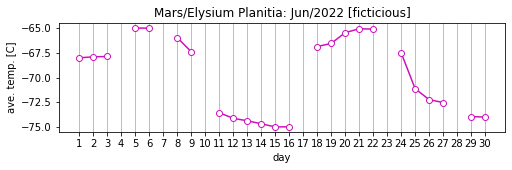

In [234]:
import numpy as np
import matplotlib.pyplot as plt


#--- geração de campo de temperatura aleatório
np.random.seed(4)
temps = 23.4 + (28.6-23.34)*np.random.rand(30)
temps = 5*np.sin(np.sort(temp)) - 70
temps[[3,6,9,16,22,27]] = np.nan

plt.figure(figsize=(8,2))
plt.plot(temps,'o-',mfc='w',c='#cc11bb')
plt.grid(axis='x')
plt.xticks(np.arange(0,30),np.arange(1,31).astype(str));
plt.xlabel('day')
plt.ylabel('ave. temp. [C]')
plt.title('Mars/Elysium Planitia: Jun/2022 [ficticious]');
plt.savefig('../figs/q31-mars-temp.png')
#---

dates = pd.date_range(start='6/1/2022', freq='D', periods=30)
db = pd.Series(temps, index=dates)

In [233]:
def correct(a):
    count = 0
    a = a.fillna(0) ## primeiro realiza a troca por um valor que conhecemos.  
    for x in a:
        if x == 0:
            a[count] = np.mean(a[count-3:count]) #Tiranda a média dos 4 valores anteriores.
            #print(f'{count-3}, {count}') # as posições q são tiradas as médias.
        count+=1
    return a;

result = correct(db)
mean = f'mean: {np.round(np.mean(result),2)}'
m = f'min: {np.round(np.min(result),2)}'
M = f'max: {np.round(np.max(result),2)}'
mean,m,M

('mean: -69.55', 'min: -74.98', 'max: -65.0')